## Analysis Plan
## Mariam Sedrakyan 

Music is a universal language allowing artists to express their feelings and thoughts. Music has been an essential part of human existence since time immemorial. The motivation of my project is to compare and contrast to understand how music tastes have changed in the last 20 or more years in America. Music taste is an adynamic and ever-evolving aspect representing individuals based on their experience. Life is a series of experiences, and these experiences often become intertwined with specific songs or genres. A song associated with a memorable event, a period of growth, or a significant relationship can evoke powerful emotions. 

My final project is about how music taste changed in America, what some specific features of tracks changed, and how they affected the popularity of the music. For my data resource, I used Spotify API. It is very reliable data because what is collected is based on people's behaviors and preferences. With the Spotify app, I got __audio_features__ for tracks. This helped me to understand tracks detailed based on their "danceability," "instrumentals," "speechiness," "tempo," and act. I picked to dive into "danceability" and "speechiness" because, based on my previous reports, I found out that if more "danceability" the track, there is a higher chance that people will love it. I also chose "speechiness" because I often hear from my parents and the older generation that "Songs back then had deeper lyrics and content; songs nowadays are just beaten with little words that have no meaning." 


In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import base64
import json
import urllib

Below are the functions I used to get access tokens from Spotify's API. 
An access token is a string representing the authorization granted to the client. It is used in HTTP to prove the authenticity of the sender and receiver.

In [2]:
Client_ID = pd.read_csv("Spotify-Keys_9-23-21.txt")['Client_ID'].iloc[0]
Client_Secret = pd.read_csv("Spotify-Keys_secret.txt")['Client_Secret'].iloc[0]

Some of the information need to be hidden for confidentiality 

In [3]:
# Client_ID

In [4]:
# Client_Secret

In [5]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [6]:
# client_cred

In [7]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [8]:
# headers

I am getting the access to token to check the response

In [9]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [10]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [11]:
session_key_response.status_code

200

In [12]:
# session_key_response.json()['access_token']

In [13]:
session_header_key = session_key_response.json()

In [14]:
key = session_header_key['access_token']

In [15]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [16]:
# session_headers

# Hits of early 2000s

After researching, I found a playlist with all the popular hits from the early 2000s. This playlist will give me the base to move forward and narrow down to find the most popular album then.

Playlist ID

In [17]:
early_hits_id="37i9dQZF1DWUZv12GM5cFk"

In [18]:
early_hits_url= 'https://api.spotify.com/v1/playlists/{}'.format(early_hits_id)

In [19]:
early_hits_response = requests.get(url = early_hits_url, headers = session_headers)
early_hits_response.status_code

200

In [20]:
early_hits = early_hits_response.json()

In [21]:
early_hits.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [22]:
early_hits['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [23]:
early_hits['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [24]:
early_hits['tracks']['items'][0]['track']['album']['release_date']

'2000-05-16'

My frist dataframe represents couple important information about the tracks inside playlist. 

I separated the most helpful parts. As we can see, the data frame is sorted from the most popular to the least popular songs. One hundred being very popular and 0 being least popular, our result shows that "Oops!... I did it again" is the most popular song in the playlist.

In [25]:
early_hits_df = pd.DataFrame([x['track'] for x in early_hits['tracks']['items']])
id_name_popularity_df =early_hits_df[['name','popularity','id','type']]
id_name_popularity_df.head(5)

,name,popularity,id,type
0,Oops!...I Did It Again,81,6naxalmIoLFWR0siv8dnQQ,track
1,All The Small Things,84,2m1hi0nfMR9vdGC8UcrnwU,track
2,Breathe,68,3y4LxiYMgDl4RethdzpmNe,track
3,It's My Life,82,0v1XpBHnsbkCn7iJ9Ucr1l,track
4,Bye Bye Bye,74,62bOmKYxYg7dhrC6gH9vFn,track


To get the date of the tracks, I need to look into the albums they were created. This is when I started to face some challenges. This graph shows me the realized date of the albums the tracks were in. My original idea was to compare two playlists; however, as we can see, the type column changed from "track" to "album" once I pulled out "release_date." This means that the "id" column does not match anymore. One way to solve this problem was to create an Excel file and manually create data with tracks and release_date. However, because of the short time, I decided to work with my existing data to compare two albums.

In [26]:
release_dates = pd.DataFrame([x['track']['album']for x in early_hits['tracks']['items']])
album_dates_df=release_dates[['name','release_date','id','type']]
album_dates_df.head(5).sort_values('release_date',ascending = True)

,name,release_date,id,type
1,Enema Of The State,1999-06-01,652N05EcNH1a4bIlUixQE2,album
2,Breathe,1999-11-09,3BGPil8BDPVoDK0lnUPtvb,album
3,Crush,2000-01-01,0Q9SljCrM0CL0bR23MuP69,album
4,No Strings Attached,2000-03-21,20RMokVwJ2wjQ0s8FOdOFC,album
0,Oops!... I Did It Again,2000-05-16,5PmgtkodFl2Om3hMXONDll,album


Below, we can see the albums released in the early 2000s. Use __get_albums__ endpoint to get more information about albums. This will allow me to join album IDs.

In [27]:
get_old_albums_url = 'https://api.spotify.com/v1/albums?ids={}'\
.format(','.join(list(album_dates_df['id'] [0:20])))

In [28]:
old_album_features =requests.get(url = get_old_albums_url , headers = session_headers)
old_album_features.status_code

200

In [29]:
old_album_response = old_album_features.json()

In [30]:
old_album_response_df = pd.DataFrame(old_album_response['albums'])

I need to find the most popular album from the early 2000s to move forward. Below, we can see album name popularity, with 100 being the most popular and 0 being the least popular, ID, and type. I also want to explain why I dropped the "Sing When You're Winning" album because after visualizing the graph, I realized that this is the only album that was realized after 2010, which does not satisfy my analysis's requirements. 

In [31]:
old_albums_popularity_df = pd.DataFrame(old_album_response_df[['name', 'popularity', 'release_date', 'id', 'type']])
old_albums_popularity_df = old_albums_popularity_df.sort_values('popularity', ascending=False)
old_albums_popularity_df = old_albums_popularity_df[old_albums_popularity_df['name'] != "Sing When You're Winning"]
old_albums_popularity_df.head(5)

,name,popularity,release_date,id,type
9,Parachutes,87,2000-07-10,6ZG5lRT77aJ3btmArcykra,album
10,Hybrid Theory (Bonus Edition),86,2000-10-24,6hPkbAV3ZXpGZBGUvL6jVM,album
6,The Marshall Mathers LP,85,2000-05-23,6t7956yu5zYf5A829XRiHC,album
11,Californication (Deluxe Edition),85,1999-06-08,2Y9IRtehByVkegoD7TcLfi,album
13,2001,84,1999-11-16,7q2B4M5EiBkqrlsNW8lB7N,album


For visualization I converted the 'release_date' values to Timestamps.

In [32]:
old_albums_popularity_df['timestamp'] = [pd.Timestamp(x) for x in old_albums_popularity_df['release_date']]

My first graph represents timestamp vs. popularity. Based on the release date, this graph shows us what album was most popular. The graph is pretty spread out. However, we can see more albums have a popularity of less than 60, and as the year grows, the popularity decreases. 

Based on this graph, I decided to pick a trendy album that was not released after 2001. This way, I can see the difference between

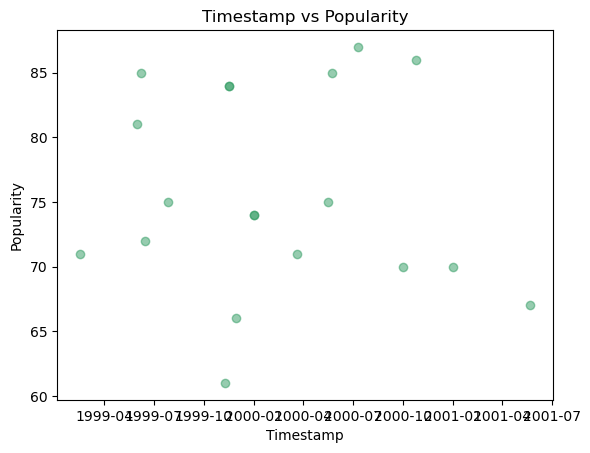

In [33]:
fig1, ax1 = plt.subplots()
ax1.scatter(old_albums_popularity_df['timestamp'], old_albums_popularity_df['popularity'], label='popularity',alpha= .5, color ="#2F9B61",)
ax1.set_title('Timestamp vs Popularity')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Popularity')
#ax1.xticks ( x, 'Timestamp',rotation='vertical')

plt.show()

I picked the albume called Californication (Deluxe Edition)

In [34]:
california_id="2Y9IRtehByVkegoD7TcLfi"

In [35]:
california_tracks_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(california_id)


In [36]:
california_album_response = requests.get(url = california_tracks_url, headers = session_headers)
california_album_response.status_code

200

In [37]:
california_of_the_state = california_album_response.json()

In [38]:
california_of_the_state.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [39]:
california_df = pd.DataFrame(california_of_the_state['items'])
california_name_df= pd.DataFrame(california_df [['name','id','type']])
california_name_df.head()

,name,id,type
0,Around the World,0aGQHMr7bc23Y9Ts84ffop,track
1,Parallel Universe,1Se0r96r0gnqg67kJPmESc,track
2,Scar Tissue,1G391cbiT3v3Cywg8T7DM1,track
3,Otherside,64BbK9SFKH2jk86U3dGj2P,track
4,Get on Top,0GcWf1Cc4ixN35D3O9VdcP,track


In [40]:
california_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(california_df['id'])))


In [41]:
california_features_response = requests.get(url = california_audio_features , headers = session_headers)
california_features_response.status_code

200

In [42]:
california_features = california_features_response.json()

In [43]:
california_features.keys()

dict_keys(['audio_features'])

After joining the IDs of the tracks inside the album, I separated the "danceability"  and "speechiness" of the tracks. These are the two features I will use as my base to compare and contrast the albums. 


In [44]:
california_features_df = pd.DataFrame(california_features['audio_features'])
california_two_features_df= pd.DataFrame(california_features_df[['danceability','speechiness','id']])
california_two_features_df.head()

,danceability,speechiness,id
0,0.504,0.1830,0aGQHMr7bc23Y9Ts84ffop
1,0.343,0.2120,1Se0r96r0gnqg67kJPmESc
2,0.595,0.0295,1G391cbiT3v3Cywg8T7DM1
3,0.458,0.0574,64BbK9SFKH2jk86U3dGj2P
4,0.573,0.3420,0GcWf1Cc4ixN35D3O9VdcP


Here is the whole dataframe and all the important information I am going to user 

1 is very danceable   
0 is none danceable   
1 is high speechiness  
0 is low speechiness  

In [45]:
california_final_df= pd.merge(california_name_df, california_two_features_df, how = 'inner', on = 'id')
california_final_df.head()

,name,id,type,danceability,speechiness
0,Around the World,0aGQHMr7bc23Y9Ts84ffop,track,0.504,0.1830
1,Parallel Universe,1Se0r96r0gnqg67kJPmESc,track,0.343,0.2120
2,Scar Tissue,1G391cbiT3v3Cywg8T7DM1,track,0.595,0.0295
3,Otherside,64BbK9SFKH2jk86U3dGj2P,track,0.458,0.0574
4,Get on Top,0GcWf1Cc4ixN35D3O9VdcP,track,0.573,0.3420


My next graph represents the picked album's danceability vs speechiness. As we can see, my picked album has low "speechiness," with only one song having a speech level of 0.35; however, the danceability is more focused around 0.6, which is higher than the average. With one song being really danceable, that reaches 0.75.

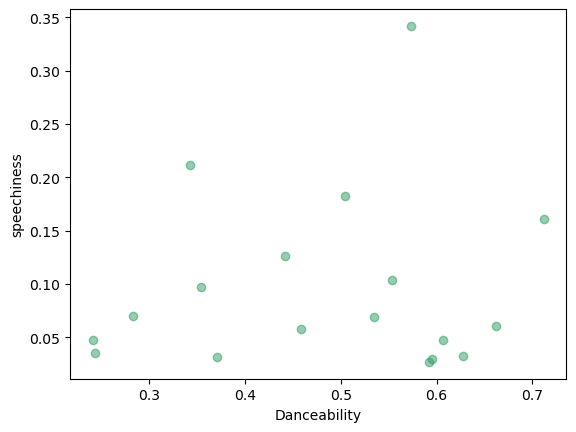

In [46]:
fig4, ax4 =  plt.subplots()
ax4.scatter( x = california_final_df ['danceability'], 
             y = california_final_df['speechiness'],alpha= .5, color ="#2F9B61" )

ax4.set_xlabel('Danceability')
ax4.set_ylabel('speechiness')
plt.show()

### I will repeat the same process again with new playlist 

# Hits of 2022

### I repeated the first two graph for songs and album from 2022 


In [47]:
new_id= "56r5qRUv3jSxADdmBkhcz7"

In [48]:
new_playlist_url = 'https://api.spotify.com/v1/playlists/{}'.format(new_id)

In [49]:
new_playlist_url_response = requests.get(url = new_playlist_url, headers = session_headers)


In [50]:
new_playlist_url_data=new_playlist_url_response.json()

In [51]:
new_playlist_url_data.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [52]:
new_playlist_df = pd.DataFrame([x['track'] for x in new_playlist_url_data['tracks']['items']])
new_playlist_df.head(2)

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,167303,False,False,{'isrc': 'USSM12200612'},{'spotify': 'https://open.spotify.com/track/4L...,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,4LRPiXqCikLlN15c3yImP7,False,As It Was,58,None,True,1,track,spotify:track:4LRPiXqCikLlN15c3yImP7
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,200690,False,False,{'isrc': 'USUG12205736'},{'spotify': 'https://open.spotify.com/track/0V...,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,0V3wPSX9ygBnCm8psDIegu,False,Anti-Hero,92,None,True,3,track,spotify:track:0V3wPSX9ygBnCm8psDIegu


In [53]:
new_release_dates = pd.DataFrame([x['track']['album']for x in new_playlist_url_data['tracks']['items']])
new_release_dates.head()

,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,single,[{'external_urls': {'spotify': 'https://open.s...,[],{'spotify': 'https://open.spotify.com/album/2p...,https://api.spotify.com/v1/albums/2pqdSWeJVsXA...,2pqdSWeJVsXAhHFuVLzuA8,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",As It Was,2022-03-31,day,1,album,spotify:album:2pqdSWeJVsXAhHFuVLzuA8
1,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/15...,https://api.spotify.com/v1/albums/151w1FgRZfnK...,151w1FgRZfnKZA9FEcg9Z3,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Midnights,2022-10-21,day,13,album,spotify:album:151w1FgRZfnKZA9FEcg9Z3
2,album,[{'external_urls': {'spotify': 'https://open.s...,[],{'spotify': 'https://open.spotify.com/album/0K...,https://api.spotify.com/v1/albums/0KTj6k94XZh0...,0KTj6k94XZh0c6IEMfxeWV,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Dreamland (+ Bonus Levels),2020-08-06,day,18,album,spotify:album:0KTj6k94XZh0c6IEMfxeWV
3,single,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/0g...,https://api.spotify.com/v1/albums/0gX9tkL5njRa...,0gX9tkL5njRax8ymWcXARi,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Unholy (feat. Kim Petras),2022-09-22,day,1,album,spotify:album:0gX9tkL5njRax8ymWcXARi
4,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/3R...,https://api.spotify.com/v1/albums/3RQQmkQEvNCY...,3RQQmkQEvNCY4prGKE6oc5,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Un Verano Sin Ti,2022-05-06,day,23,album,spotify:album:3RQQmkQEvNCY4prGKE6oc5


In [54]:
new_albums_dates= pd.DataFrame (new_release_dates[['name','release_date','id','type']])
new_albums_dates.head(5).sort_values('release_date',ascending = False)

,name,release_date,id,type
1,Midnights,2022-10-21,151w1FgRZfnKZA9FEcg9Z3,album
3,Unholy (feat. Kim Petras),2022-09-22,0gX9tkL5njRax8ymWcXARi,album
4,Un Verano Sin Ti,2022-05-06,3RQQmkQEvNCY4prGKE6oc5,album
0,As It Was,2022-03-31,2pqdSWeJVsXAhHFuVLzuA8,album
2,Dreamland (+ Bonus Levels),2020-08-06,0KTj6k94XZh0c6IEMfxeWV,album


In [55]:
get_new_albums_url = 'https://api.spotify.com/v1/albums?ids={}'\
.format(','.join(list(new_albums_dates['id'] [0:20])))

In [56]:
get_new_albums_url

'https://api.spotify.com/v1/albums?ids=2pqdSWeJVsXAhHFuVLzuA8,151w1FgRZfnKZA9FEcg9Z3,0KTj6k94XZh0c6IEMfxeWV,0gX9tkL5njRax8ymWcXARi,3RQQmkQEvNCY4prGKE6oc5,6FJxoadUE4JNVwWHghBwnb,3OYnManu1Nlxnw9OMng7BH,6ZZvx0aefZV3LKa053fn71,6tUQPKlpR4x1gjrXTtOImI,3Ks0eeH0GWpY4AU20D5HPD,4PNqWiJAfjj32hVvlchV5u,4uVXrwE4aSV2L2aqAHSOXa,5dGWwsZ9iB2Xc3UKR0gif2,4JApkbiesQxv5drdEZRlZC,5r36AJ6VOJtp00oxSkBZ5h,6s84u2TUpR3wdUv4NgKA2j,3RQQmkQEvNCY4prGKE6oc5,0h5MuD9O9o1VoN07mQmwMQ,622NFw5Yk0OReMJ2XWcXUh,5omNd3Mkij9C3ZeW19rRmv'

In [57]:
new_album_features =requests.get(url = get_new_albums_url , headers = session_headers)
new_album_features.status_code

200

In [58]:
new_album_response = new_album_features.json()

In [59]:
new_album_response.keys()

dict_keys(['albums'])

In [60]:
new_album_response_df = pd.DataFrame(new_album_response['albums'])

In [61]:
new_albums_popularity_df= pd.DataFrame (new_album_response_df[['name','popularity','release_date','id','type']])
new_albums_popularity_df.head(6).sort_values('popularity',ascending = False)

,name,popularity,release_date,id,type
4,Un Verano Sin Ti,94,2022-05-06,3RQQmkQEvNCY4prGKE6oc5,album
1,Midnights,93,2022-10-21,151w1FgRZfnKZA9FEcg9Z3,album
5,RENAISSANCE,86,2022-07-29,6FJxoadUE4JNVwWHghBwnb,album
3,Unholy (feat. Kim Petras),75,2022-09-22,0gX9tkL5njRax8ymWcXARi,album
0,As It Was,49,2022-03-31,2pqdSWeJVsXAhHFuVLzuA8,album
2,Dreamland (+ Bonus Levels),18,2020-08-06,0KTj6k94XZh0c6IEMfxeWV,album


In [62]:
new_albums_popularity_df['timestamp'] = pd.to_datetime(new_albums_popularity_df['release_date'])

As we can see, the albums from 2020 to 2022 are top-rated, with only two albums with a popularity >20. The most famous albums were released from mid-2022 to early 2023. As we can see, there is a dramatic difference between the popularity of "albums from the early 2000s and 2020s". WHY? 

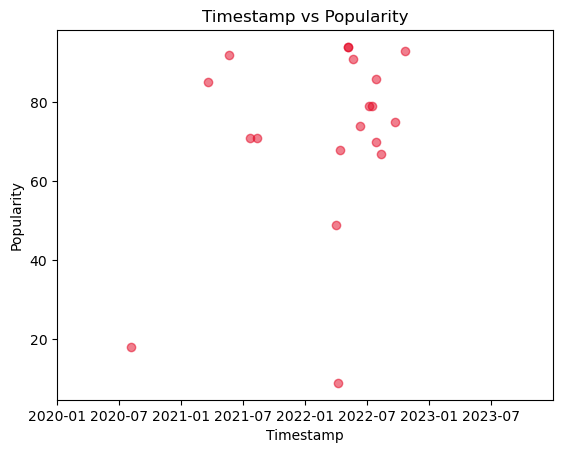

In [63]:
fig2, ax2 = plt.subplots()
ax2.scatter(new_albums_popularity_df['timestamp'], new_albums_popularity_df['popularity'], label='popularity',alpha= .5, color='#E3001E',)
ax2.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-12-31'))
ax2.set_title('Timestamp vs Popularity')
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Popularity')

plt.show()

It was hard to pick one album because all the albums were so popular and danced on one. The most popular song that was released mid 2022 was "Midnights" by Taylor Swift 

In [64]:
new_album_id = "151w1FgRZfnKZA9FEcg9Z3"

In [65]:
mid_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(new_album_id)


In [66]:
mid_album_response = requests.get(url = mid_album_url, headers = session_headers)
mid_album_response.status_code

200

In [67]:
mid_of_the_state = mid_album_response.json()

I repeated the same steps to visualize and organize the "Midnights" albums. Again, I pulled the details about tracks that are relevant to my analysis.  
"Talk about the tracks "

In [68]:
mid_df = pd.DataFrame(mid_of_the_state['items'])
mid_name_df= pd.DataFrame(mid_df [['name','id','type', ]])
mid_name_df.head()

,name,id,type
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,track
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,track
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,track
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,track
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,track


My next step is to combine the track's IDs and get the details about their structure. I used __audio_features__ endpoint to get information, and I joined the ids. 

In [69]:
mid_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(mid_df['id'])))

In [70]:
mid_features_response = requests.get(url = mid_audio_features , headers = session_headers)
mid_features_response.status_code

200

In [71]:
mid_features = mid_features_response.json()

In [72]:
mid_features_df = pd.DataFrame(mid_features['audio_features'])
mid_two_features_df= pd.DataFrame(mid_features_df[['danceability','speechiness','id']])
mid_two_features_df.head()

,danceability,speechiness,id
0,0.733,0.0800,5jQI2r1RdgtuT8S3iG8zFC
1,0.637,0.0564,3eX0NZfLtGzoLUxPNvRfqm
2,0.637,0.0519,0V3wPSX9ygBnCm8psDIegu
3,0.663,0.0375,1wtOxkiel43cVs0Yux5Q4h
4,0.696,0.0656,4D7BCuvgdJlYvlX5WlN54t


From my final data frame for "Midnights," we can get a vague idea there are some danceable and some not-so-danceable songs and many songs with low "speechiness." Later, I will use visualization to understand the relationship better. 

In [73]:
mid_final_df= pd.merge(mid_name_df, mid_two_features_df, how = 'inner', on = 'id')
mid_final_df.head(10)

,name,id,type,danceability,speechiness
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,track,0.733,0.0800
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,track,0.637,0.0564
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,track,0.637,0.0519
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,track,0.663,0.0375
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,track,0.696,0.0656
5,Midnight Rain,3rWDp9tBPQR9z6U5YyRSK4,track,0.643,0.0767
6,Question...?,0heeNYlwOGuUSe7TgUD27B,track,0.751,0.1670
7,Vigilante Shit,1xwAWUI6Dj0WGC3KiUPN0O,track,0.798,0.3900
8,Bejeweled,3qoftcUZaUOncvIYjFSPdE,track,0.696,0.0693
9,Labyrinth,0A1JLUlkZkp2EFrosoNQi0,track,0.406,0.0517


I used a Scatter plot to visualize the relationship between Speechiness vs. danceability. As suspected, the album has most songs with low "Speechiness" and only one that is below average, about> 0.40. However, the majority of songs are very danceable. Average danceability is about 0.65 to 0.7, which is above average. There is only one song with high danceability and high speechiness. 

"Add the name of the songs on the graph to visualize the graph better."

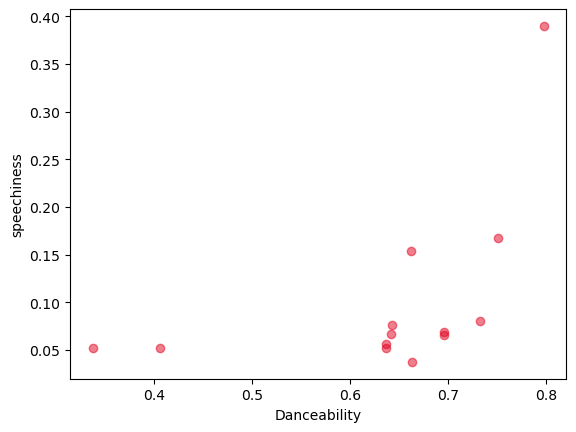

In [74]:
fig3, ax3 =  plt.subplots()
ax3.scatter( x = mid_final_df ['danceability'], 
             y = mid_final_df['speechiness'],alpha= .5, color='#E3001E' )

ax3.set_xlabel('Danceability')
ax3.set_ylabel('speechiness')
plt.show()

I used a scatter plot to show the relationship between the two albums better. The graph represents two albums together based on their danceability vs. speechiness. We can see a similar pattern in terms of "speechiness." Only a few songs have relatively high "speechiness," and the rate is> 0.40. However, we can notice that the "Midnight" album has lower speechiness than the "California" album. For Midnight, there are only two songs below 0.45. The "California" album is more spread; however danceability is >0.73

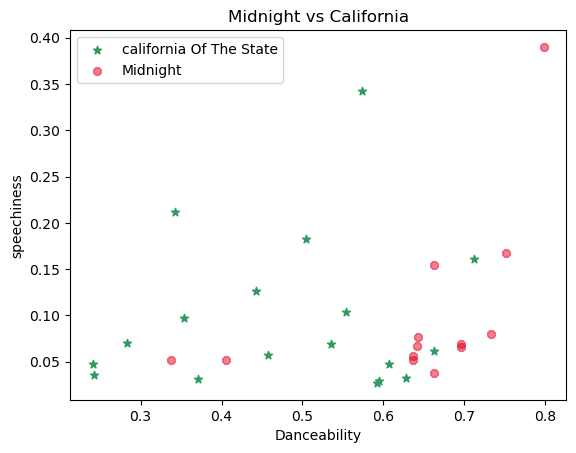

In [75]:
fig5, ax5 =  plt.subplots()
ax5.scatter( x = california_final_df  ['danceability'], 
             y = california_final_df ['speechiness'],
            label = 'california Of The State',
            color = '#2F9B61',
            marker ='*')
ax5.scatter( x = mid_final_df ['danceability'], 
             y = mid_final_df  ['speechiness'],
            label = 'Midnight',
            alpha= .5, 
            marker ='8',
           color = '#E3001E')

ax5.set_title('Midnight vs California')
ax5.set_xlabel('Danceability')
ax5.set_ylabel('speechiness')
ax5.legend()

plt.show()

Also, I compared the features of the two albums separately to get a clearer view of the relationship. As we can see, the "danceability" between the two albums is dramatically different. "Midnight" is mostly popular, and "Californa" is spread out between 0.1 to 0.75. The mid for "midnight" is 0.68, and for "California," 0.55

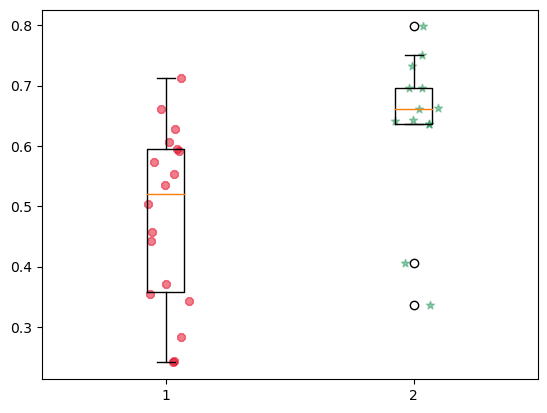

In [76]:
california_speech= california_final_df   ['danceability']
mid_speech = mid_final_df['danceability']

california_ax = [1]*len(california_speech)
mid_ax = [2]*len(mid_speech )

bur_x_jitter = np.random.uniform(-0.10,0.10,len (california_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (mid_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(california_speech,positions= [1])
ax8.boxplot(mid_speech,positions= [2])
ax8.scatter(california_ax + bur_x_jitter, california_speech, alpha=0.5, color='#E3001E', marker ='8')
ax8.scatter(mid_ax + chr_x_jitter, mid_speech, alpha=0.5, color='#2F9B61',marker ='*')


ax5.legend()
plt.show()


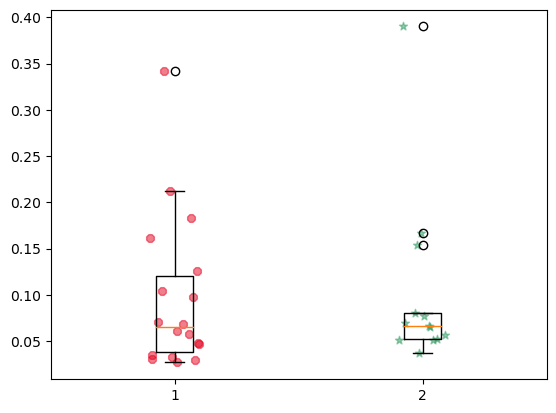

In [77]:
california_speech= california_final_df   ['speechiness']
mid_speech = mid_final_df['speechiness']

california_ax = [1]*len(california_speech)
mid_ax = [2]*len(mid_speech )

bur_x_jitter = np.random.uniform(-0.10,0.10,len (california_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (mid_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(california_speech,positions= [1])
ax8.boxplot(mid_speech,positions= [2])
ax8.scatter(california_ax + bur_x_jitter, california_speech, alpha=0.5, color='#E3001E', marker ='8', label='Aguilera')
ax8.scatter(mid_ax + chr_x_jitter, mid_speech, alpha=0.5, color='#2F9B61',marker ='*', label='Sia')
plt.show()

# Conclution 

I want to talk about the limitations of my project.
1. it is hard to assume by comparing only two features that describe the tracks. I picked "danceability" because, from my previous analysis throughout the semester, I learned that the more danceable the song is, the more popular it is, and for my analysis, I wanted to compare albums that were hit during the realized year. I also picked "speechiness" because there are a lot of stereotypes that nowadays have no meaning and proper lyrics. Artists repeat the same thing or play some beats instead of singing. However, these more than two features are needed to make a perfect conclusion about the overall picture. Later, to make the analysis more accurate, I would like to add more features to the data to compare and contrast more features. 
2. Realise date. I faced a challenge when I was trying to get the realized data for my tracks from the picked playlist. However, instead of giving me the release date of the stack, Spotify API gave me the release date of the album the track was in. This limited my window into comparing to albums rather than playlists. In the future, I would like to collect released data specifically for tracks by either doing it manually or learning new ways to fix this problem. 
3. Spotify. Spotify was founded around 2006, so the albums from the early 2000s and late 1999s were not in Spotify when they came out. In the first part, when I had to pick the most popular song and then the album of the early 2000s, the data was mostly collected from people born after the 2000s.